<a href="https://colab.research.google.com/github/Nirav-Madhani/RoboticArmFK/blob/main/Robotics_FK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from math import cos ,sin ,radians
import numpy as np
from numpy import pi
from matplotlib import pyplot as plt

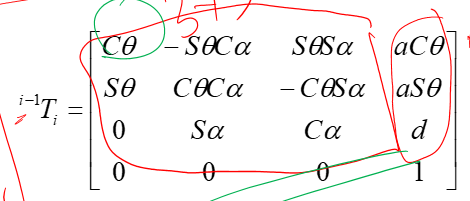

In [ ]:
def Tmatrix(joint):
  #0-a 1alpha 2-d 3 thtea
  s = sin(radians(joint[3]))
  c = cos(radians(joint[3]))
  sa = sin(radians(joint[1]))
  ca = cos(radians(joint[1]))
  a,d = joint[0],joint[2]
  return np.array([
          [c,-s*ca,s*sa,a*c],
          [s,c*ca,-c*sa,a*s],
          [0,sa,ca,d],
          [0,0,0,1]
          ])

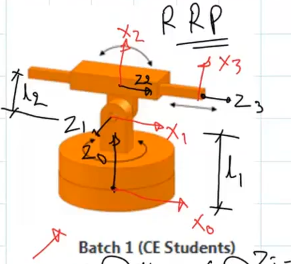

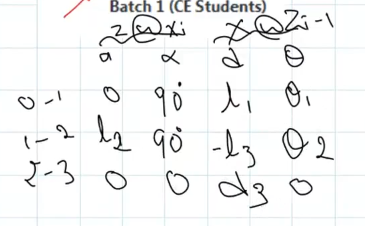

[works if a=d2 not d]

##Mapping as shown below
- Angle at z0 : t1
- Angle at z1 : t2
- Distance at z2 : d2


## To Control camera:-
* v1 for vertical orientation
* v2 for horizontal orientation

In [ ]:
l1,l2,l3 = 1,.2,.2#eval(input("Enter l1,l2,l3 csv"))
@interact
def robotArm(t1=(-90,90),t2=(-90,90),d2=(0.2,1.0),v1=(-90,90),
                            v2=(-90,90)):
  joint1 = [0,90,l1,t1]
  joint2 = [l2,90,-l3,t2]
  joint3 = [d2,0,0,0]
  m01 = Tmatrix(joint1)
  m12 = Tmatrix(joint2)
  m23 = Tmatrix(joint3)
  m02 = np.dot(m01,m12)
  m03 = np.dot(m02,m23)
  base = np.array([0,0,0,1]).T

  c01 = np.dot(m01,base)
  c02 = np.dot(m02,base)
  c03 = np.dot(m03,base)
  
  fig = plt.figure()
  ax = plt.axes(projection='3d')
  ax.view_init(v1, v2)
  minmax=(-1,1)
  ax.set_xlim(minmax)
  ax.set_ylim(minmax) 
  ax.set_zlim((0,1)) 
  plt.plot([0,c01[0],c02[0],c03[0]],[0,c01[1],c02[1],c03[1]],[0,c01[2],c02[2],c03[2]],'orange',marker='o', markerfacecolor='red', markersize=12)

interactive(children=(IntSlider(value=0, description='t1', max=90, min=-90), IntSlider(value=0, description='t…